# Hamiltonian Monte Carlo from Scratch (numpy only!)

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from getdist import MCSamples,plots
%matplotlib inline

In [2]:
data = np.genfromtxt('data_HMC.txt')
x = data[:,0]
y = data[:,1]
sigma = data[:,2]

In [8]:
# Model
def model(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2

# Log-likelihood
def loglikelihood(x, y, sigma, a0, a1, a2):
    if not (500 < a0 < 2000 and 0 < a1 < 10 and 0 < a2 < 5):
        return -np.inf
    return -0.5 * np.sum(((model(x, a0, a1, a2) - y) / sigma)**2)

# Potential energy
def U(x, y, sigma, a0, a1, a2):
    return -loglikelihood(x, y, sigma, a0, a1, a2)

# Gradient of potential energy
def gradient(x, y, sigma, params):
    a0, a1, a2 = params
    pred = model(x, a0, a1, a2)
    residual = (pred - y) / sigma**2
    grad_a0 = np.sum(residual)
    grad_a1 = np.sum(residual * x)
    grad_a2 = np.sum(residual * x**2)
    return np.array([grad_a0, grad_a1, grad_a2])

# Leapfrog method
def leapfrog_method(mom, pos, dt, x, y, sigma):
    mom_half = mom - 0.5 * dt * gradient(x, y, sigma, pos)
    pos_new = pos + dt * mom_half
    mom_new = mom_half - 0.5 * dt * gradient(x, y, sigma, pos_new)
    return mom_new, pos_new

# Leapfrog run
def leapfrog_run(mom, pos, dt, x, y, sigma, time_steps):
    position = [pos]
    momentum = [mom]
    for _ in range(time_steps):
        mom_new, pos_new = leapfrog_method(momentum[-1], position[-1], dt, x, y, sigma)
        position.append(pos_new)
        momentum.append(mom_new)
    return np.array(position[-1]), np.array(momentum[-1])

In [9]:
initial_pos = np.array([1500, 5, 3])
parameters = [initial_pos]
dt = np.array([1, 0.01, 0.001])
time_steps = 15
N_samples = 100000
for _ in range(N_samples):
    momentum = np.random.normal(size=3)
    old_likelihood = loglikelihood(x, y, sigma, parameters[-1][0], parameters[-1][1], parameters[-1][2]) + np.dot(momentum,momentum)/2
    final_pos, final_mom = leapfrog_run(momentum, parameters[-1], dt, x, y, sigma, time_steps)
    new_likelihood = loglikelihood(x, y, sigma, final_pos[0], final_pos[1], final_pos[2]) + np.dot(final_mom,final_mom)/2

    ratio = min(1, np.exp(new_likelihood-old_likelihood))

    if np.random.uniform()<ratio:
        parameters.append(final_pos)

In [11]:
print(len(parameters))
print("Acceptance Ratio:", len(parameters)/N_samples)

82741
Acceptance Ratio: 0.82741


In [12]:
parameters = np.array(parameters[6000:])

Removed no burn in


<Figure size 600x450 with 0 Axes>

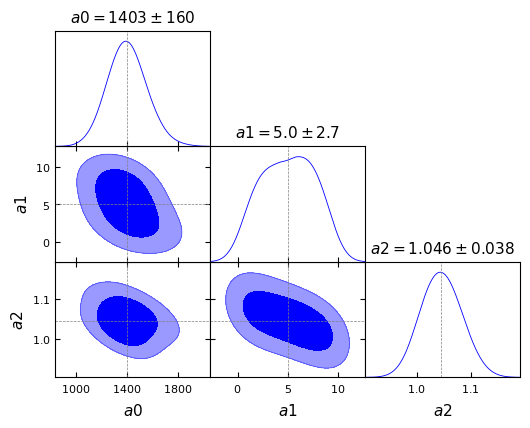

In [13]:
a0_samples = parameters[:,0]
a1_samples = parameters[:,1]
a2_samples = parameters[:,2]

# Calculate means and standard deviations for a0, a1, and a2
a0_mean = np.mean(a0_samples)
a1_mean = np.mean(a1_samples)
a2_mean = np.mean(a2_samples)
a0_std = np.std(a0_samples)
a1_std = np.std(a1_samples)
a2_std = np.std(a2_samples)

# Create MCSamples instance
samples = MCSamples(samples=np.column_stack([a0_samples, a1_samples, a2_samples]),
                     names=['a0', 'a1', 'a2'],
                     labels=['a0', 'a1', 'a2'])

# Set up the plotting environment with customization
g = plots.get_single_plotter()
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add = 0.4
g.settings.title_limit_fontsize = 14

# Define markers with uncertainties
markers = {
    'a0': a0_mean,
    'a1': a1_mean,
    'a2': a2_mean
}
uncertainties = {
    'a0': (a0_mean - a0_std, a0_mean + a0_std),
    'a1': (a1_mean - a1_std, a1_mean + a1_std),
    'a2': (a2_mean - a2_std, a2_mean + a2_std)
}

# Create the triangle plot
g.triangle_plot(
    [samples],
    filled=True,
    markers=markers,
    legend_loc='upper right',
    line_args=[{'ls': '-', 'color': 'blue'}],
    contour_colors=['blue'],
    title_limit=1
)
plt.show()

# code for animation;

In [15]:
# Model
def model(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2

# Log-likelihood
def loglikelihood(x, y, sigma, a0, a1, a2):
    if not (500 < a0 < 2000 and 0 < a1 < 10 and -1 < a2 < 4):
        return -np.inf
    return -0.5 * np.sum(((model(x, a0, a1, a2) - y) / sigma)**2)

# Potential energy
def U(x, y, sigma, a0, a1, a2):
    return -loglikelihood(x, y, sigma, a0, a1, a2)

# Gradient of potential energy
def gradient(x, y, sigma, params):
    a0, a1, a2 = params
    pred = model(x, a0, a1, a2)
    residual = (pred - y) / sigma**2
    grad_a0 = np.sum(residual)
    grad_a1 = np.sum(residual * x)
    grad_a2 = np.sum(residual * x**2)
    return np.array([grad_a0, grad_a1, grad_a2])

# Leapfrog method
def leapfrog_method(mom, pos, dt, x, y, sigma):
    mom_half = mom - 0.5 * dt * gradient(x, y, sigma, pos)
    pos_new = pos + dt * mom_half
    mom_new = mom_half - 0.5 * dt * gradient(x, y, sigma, pos_new)
    return mom_new, pos_new

# Leapfrog run
def leapfrog_run(mom, pos, dt, x, y, sigma, time_steps):
    position = [pos]
    momentum = [mom]
    for _ in range(time_steps):
        mom_new, pos_new = leapfrog_method(momentum[-1], position[-1], dt, x, y, sigma)
        position.append(pos_new)
        momentum.append(mom_new)
        # This function now also returns trajectory
    return np.array(position[-1]), np.array(momentum[-1]), np.array(position), np.array(momentum)

In [20]:
initial_pos = np.array([1500, 10, 3])
parameters = [initial_pos]
dt = np.array([1, 0.01, 0.001])
time_steps = 15
N_samples = 10

#storing trajectories for animation
ext_traj_pos = []
ext_traj_mom = []

for _ in range(N_samples):
    momentum = np.random.normal(size=3)
    old_likelihood = loglikelihood(x, y, sigma, parameters[-1][0], parameters[-1][1], parameters[-1][2]) + np.dot(momentum,momentum)/2
    final_pos, final_mom, traj_pos, traj_mom = leapfrog_run(momentum, parameters[-1], dt, x, y, sigma, time_steps)
    new_likelihood = loglikelihood(x, y, sigma, final_pos[0], final_pos[1], final_pos[2]) + np.dot(final_mom,final_mom)/2

    ratio = min(1, np.exp(new_likelihood-old_likelihood))

    if np.random.uniform()<ratio:
        parameters.append(final_pos)
        ext_traj_mom.append(traj_mom)
        ext_traj_pos.append(traj_pos)

In [21]:
from matplotlib.animation import FuncAnimation
# conversion to array for simplistic use
Array_mom = np.array(ext_traj_mom)
Array_pos = np.array(ext_traj_pos)

In [31]:

# # Extract a0 (positions) and p0 (momenta)
# positions_a0 = Array_pos[:, :, 0]  # Shape (4, 16) - a0 trajectories for all samples
# momenta_p0 = Array_mom[:, :, 0]  # Shape (4, 16) - p0 trajectories for all samples

# # Initialize the figure
# fig, ax = plt.subplots()
# ax.set_xlim(np.min(positions_a0), np.max(positions_a0))  # Set x-axis limits
# ax.set_ylim(np.min(momenta_p0), np.max(momenta_p0))      # Set y-axis limits
# ax.set_xlabel("Position (a0)")
# ax.set_ylabel("Momentum (p0)")
# ax.set_title("Phase Space Trajectory: a0 vs. p0")

# # Initialize lines for each sample
# lines = [ax.plot([], [], 'o-', markersize=4, label=f"Sample {i+1}")[0] for i in range(positions_a0.shape[0])]
# ax.legend()

# # Define the update function
# def update(frame):
#     for i, line in enumerate(lines):
#         x_data = positions_a0[i, :frame + 1]  # Current a0 trajectory (up to frame)
#         y_data = momenta_p0[i, :frame + 1]   # Current p0 trajectory
#         line.set_data(x_data, y_data)        # Update line data
#     return lines

# # Create the animation
# ani = FuncAnimation(
#     fig, update, frames=positions_a0.shape[1], interval=200, blit=True
# )

# # Save the animation as a video (e.g., MP4)
# ani.save("phase_space_a0_p0.mp4", fps=5, writer="ffmpeg")

# plt.close(fig)

In [32]:
# # Initialize the figure
# fig, ax = plt.subplots()
# ax.set_xlim(np.min(positions_a0), np.max(positions_a0))  # Set x-axis limits
# ax.set_ylim(np.min(momenta_p0), np.max(momenta_p0))      # Set y-axis limits
# ax.set_xlabel("Position (a0)")
# ax.set_ylabel("Momentum (p0)")
# ax.set_title("Phase Space Trajectory: a0 vs. p0")

# # Initialize a single line for sequential animation
# line, = ax.plot([], [], 'o-', markersize=4)
# text = ax.text(0.05, 0.95, '', transform=ax.transAxes, va='top', fontsize=10)

# # Define the update function
# def update(frame):
#     # Determine which sample (chain) we are animating
#     chain_idx = frame // positions_a0.shape[1]  # Determine chain index
#     step_idx = frame % positions_a0.shape[1]   # Determine step within the chain

#     # Extract data for the current chain up to the current step
#     x_data = positions_a0[chain_idx, :step_idx + 1]
#     y_data = momenta_p0[chain_idx, :step_idx + 1]
    
#     # Update the line and text
#     line.set_data(x_data, y_data)
#     text.set_text(f"Sample {chain_idx + 1}")  # Update text to show current chain
    
#     return line, text

# # Total frames = number of steps per chain * number of chains
# total_frames = positions_a0.shape[0] * positions_a0.shape[1]

# # Create the animation
# ani = FuncAnimation(
#     fig, update, frames=total_frames, interval=200, blit=True
# )

# # Save the animation as a video (e.g., MP4)
# ani.save("phase_space_sequential.mp4", fps=5, writer="ffmpeg")

# plt.close(fig)


In [34]:
# # Initialize the figure
# fig, ax = plt.subplots()
# ax.set_xlim(np.min(positions_a0), np.max(positions_a0))  # Set x-axis limits
# ax.set_ylim(np.min(momenta_p0), np.max(momenta_p0))      # Set y-axis limits
# ax.set_xlabel("Position (a0)")
# ax.set_ylabel("Momentum (p0)")
# ax.set_title("Phase Space Trajectory: a0 vs. p0")

# # Initialize a single line for sequential animation
# line, = ax.plot([], [], 'o-', markersize=4)
# connection_line, = ax.plot([], [], 'g-', lw=2)  # Green line for accepted points
# text = ax.text(0.05, 0.95, '', transform=ax.transAxes, va='top', fontsize=10)

# # Define the update function
# def update(frame):
#     # Determine which sample (chain) we are animating
#     chain_idx = frame // positions_a0.shape[1]  # Determine chain index
#     step_idx = frame % positions_a0.shape[1]   # Determine step within the chain

#     # Extract data for the current chain up to the current step
#     x_data = positions_a0[chain_idx, :step_idx + 1]
#     y_data = momenta_p0[chain_idx, :step_idx + 1]
    
#     # Update the line with the current trajectory
#     line.set_data(x_data, y_data)

#     # Draw a green line between the end of the previous chain and the start of the current chain
#     if chain_idx > 0 and step_idx == 0:  # At the start of a new chain (except the first one)
#         prev_x = positions_a0[chain_idx - 1, -1]  # Last point of the previous chain
#         prev_y = momenta_p0[chain_idx - 1, -1]
#         curr_x = positions_a0[chain_idx, 0]       # First point of the current chain
#         curr_y = momenta_p0[chain_idx, 0]
#         connection_line.set_data([prev_x, curr_x], [prev_y, curr_y])  # Green line between chains
#     else:
#         connection_line.set_data([], [])  # No green line if not between chains

#     # Update the text to show the current chain
#     text.set_text(f"Sample {chain_idx + 1}")  # Update text to show current chain
    
#     return line, connection_line, text

# # Total frames = number of steps per chain * number of chains
# total_frames = positions_a0.shape[0] * positions_a0.shape[1]

# # Create the animation
# ani = FuncAnimation(
#     fig, update, frames=total_frames, interval=200, blit=True
# )

# # Save the animation as a video (e.g., MP4)
# ani.save("phase_space_sequential_with_connections.mp4", fps=5, writer="ffmpeg")

# plt.close(fig)


In [37]:

# # Sample data (for demonstration purposes)
# positions_a0 = Array_pos[:, :, 0]  # Shape (4, 16) - a0 trajectories for all samples
# momenta_p0 = Array_mom[:, :, 0]  # Shape (4, 16) - p0 trajectories for all samples

# # Initialize the figure
# fig, ax = plt.subplots()
# ax.set_xlim(np.min(positions_a0), np.max(positions_a0))  # Set x-axis limits
# ax.set_ylim(np.min(momenta_p0), np.max(momenta_p0))      # Set y-axis limits
# ax.set_xlabel("Position (a0)",fontsize=12)
# ax.set_ylabel("Momentum (p0)",fontsize=12)
# ax.set_title("Phase Space Trajectory: a0 vs. p0", fontsize=14)

# # Initialize a single line for sequential animation
# line, = ax.plot([], [], 'o-', markersize=4)
# connection_line, = ax.plot([], [], 'g-', lw=2)  # Green line for accepted points
# text = ax.text(0.05, 0.95, '', transform=ax.transAxes, va='top', fontsize=10)

# # Colors to cycle through for each chain
# chain_colors = ['b', 'r', 'g', 'm']  # You can add more colors to the list

# # Define the update function
# def update(frame):
#     # Determine which sample (chain) we are animating
#     chain_idx = frame // positions_a0.shape[1]  # Determine chain index
#     step_idx = frame % positions_a0.shape[1]   # Determine step within the chain

#     # Extract data for the current chain up to the current step
#     x_data = positions_a0[chain_idx, :step_idx + 1]
#     y_data = momenta_p0[chain_idx, :step_idx + 1]
    
#     # Update the line with the current trajectory and change color after each chain
#     line.set_data(x_data, y_data)
#     line.set_color(chain_colors[chain_idx])  # Change color of the chain
    
#     # Draw a green line between the end of the previous chain and the start of the current chain
#     if chain_idx > 0 and step_idx == 0:  # At the start of a new chain (except the first one)
#         prev_x = positions_a0[chain_idx - 1, -1]  # Last point of the previous chain
#         prev_y = momenta_p0[chain_idx - 1, -1]
#         curr_x = positions_a0[chain_idx, 0]       # First point of the current chain
#         curr_y = momenta_p0[chain_idx, 0]
#         connection_line.set_data([prev_x, curr_x], [prev_y, curr_y])  # Green line between chains
#     else:
#         connection_line.set_data([], [])  # No green line if not between chains

#     # Update the text to show the current chain
#     text.set_text(f"Sample {chain_idx + 1}")  # Update text to show current chain
    
#     return line, connection_line, text

# # Total frames = number of steps per chain * number of chains
# total_frames = positions_a0.shape[0] * positions_a0.shape[1]

# # Create the animation
# ani = FuncAnimation(
#     fig, update, frames=total_frames, interval=200, blit=True
# )

# # Save the animation as a video (e.g., MP4) with higher quality
# ani.save("phase_space_sequential_with_connections_high_quality.mp4", fps=5, dpi=300, writer="ffmpeg")

# plt.close(fig)


## 1 parameter high quality chain


In [39]:
# Sample data (for demonstration purposes)
positions_a0 = Array_pos[:, :, 0]  # Shape (4, 16) - a0 trajectories for all samples
momenta_p0 = Array_mom[:, :, 0]  # Shape (4, 16) - p0 trajectories for all samples

# Initialize the figure
fig, ax = plt.subplots()
ax.set_xlim(np.min(positions_a0), np.max(positions_a0))  # Set x-axis limits
ax.set_ylim(np.min(momenta_p0), np.max(momenta_p0))      # Set y-axis limits
ax.set_xlabel("Position (a0)", fontsize=12)
ax.set_ylabel("Momentum (p0)", fontsize=12)
ax.set_title("Phase Space Trajectory: a0 vs. p0", fontsize=14)

# Initialize a single line for sequential animation
line, = ax.plot([], [], 'o-', markersize=4)
connection_line, = ax.plot([], [], 'g-', lw=2)  # Green line for accepted points
text = ax.text(0.05, 0.95, '', transform=ax.transAxes, va='top', fontsize=10)

# Set color for all chains to blue
chain_color = 'b'

# Define the update function
def update(frame):
    # Determine which sample (chain) we are animating
    chain_idx = frame // positions_a0.shape[1]  # Determine chain index
    step_idx = frame % positions_a0.shape[1]   # Determine step within the chain

    # Extract data for the current chain up to the current step
    x_data = positions_a0[chain_idx, :step_idx + 1]
    y_data = momenta_p0[chain_idx, :step_idx + 1]
    
    # Update the line with the current trajectory and set color to blue for all chains
    line.set_data(x_data, y_data)
    line.set_color(chain_color)  # Set color to blue for all chains
    
    # Draw a green line between the end of the previous chain and the start of the current chain
    if chain_idx > 0 and step_idx == 0:  # At the start of a new chain (except the first one)
        prev_x = positions_a0[chain_idx - 1, -1]  # Last point of the previous chain
        prev_y = momenta_p0[chain_idx - 1, -1]
        curr_x = positions_a0[chain_idx, 0]       # First point of the current chain
        curr_y = momenta_p0[chain_idx, 0]
        connection_line.set_data([prev_x, curr_x], [prev_y, curr_y])  # Green line between chains
    else:
        connection_line.set_data([], [])  # No green line if not between chains
    if step_idx == positions_a0.shape[1] - 1:  # Only at the last step of each chain
        ax.plot(positions_a0[chain_idx, -1], momenta_p0[chain_idx, -1], 'bo', markersize=8)

    # Update the text to show the current chain
    text.set_text(f"Sample {chain_idx + 1}")  # Update text to show current chain
    
    return line, connection_line, text

# Total frames = number of steps per chain * number of chains
total_frames = positions_a0.shape[0] * positions_a0.shape[1]

# Create the animation
ani = FuncAnimation(
    fig, update, frames=total_frames, interval=200, blit=True
)

# Save the animation as a video (e.g., MP4) with higher quality
ani.save("phase_space_sequential_with_connections_high_quality.mp4", fps=5, dpi=300, writer="ffmpeg")

plt.close(fig)

## 3 parameter animation simultanously

In [22]:
# Sample data (for demonstration purposes)
positions_a0 = Array_pos[:, :, 0]  # Shape (4, 16) - a0 trajectories for all samples
positions_a1 = Array_pos[:, :, 1]  # Shape (4, 16) - a1 trajectories for all samples
positions_a2 = Array_pos[:, :, 2]  # Shape (4, 16) - a2 trajectories for all samples
momenta_p0 = Array_mom[:, :, 0]  # Shape (4, 16) - p0 trajectories for all samples
momenta_p1 = Array_mom[:, :, 1]  # Shape (4, 16) - p1 trajectories for all samples
momenta_p2 = Array_mom[:, :, 2]  # Shape (4, 16) - p2 trajectories for all samples

# Calculate fixed limits for each parameter
limits = [
    (np.min(positions_a0), np.max(positions_a0), np.min(momenta_p0), np.max(momenta_p0)),
    (np.min(positions_a1), np.max(positions_a1), np.min(momenta_p1), np.max(momenta_p1)),
    (np.min(positions_a2), np.max(positions_a2), np.min(momenta_p2), np.max(momenta_p2)),
]

# Initialize the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
titles = ["a0 vs. p0", "a1 vs. p1", "a2 vs. p2"]
lines = []
connection_lines = []
texts = []

# Set up each subplot
for i, ax in enumerate(axes):
    pos_min, pos_max, mom_min, mom_max = limits[i]  # Unpack fixed limits for each subplot
    ax.set_xlim(pos_min, pos_max)
    ax.set_ylim(mom_min, mom_max)
    ax.set_xlabel(f"Position ({titles[i][0:2]})", fontsize=12)
    ax.set_ylabel(f"Momentum ({titles[i][-2:]})", fontsize=12)
    ax.set_title(f"Phase Space Trajectory: {titles[i]}", fontsize=14)

    # Initialize lines and connection lines for each subplot
    line, = ax.plot([], [], 'o-', markersize=4)
    connection_line, = ax.plot([], [], 'g-', lw=2)
    text = ax.text(0.05, 0.95, '', transform=ax.transAxes, va='top', fontsize=10)

    lines.append(line)
    connection_lines.append(connection_line)
    texts.append(text)

# Set color for all chains to blue
chain_color = 'b'

# Define the update function
def update(frame):
    # Determine which sample (chain) we are animating
    chain_idx = frame // positions_a0.shape[1]  # Determine chain index
    step_idx = frame % positions_a0.shape[1]   # Determine step within the chain

    # Update each subplot
    for i, (pos, mom, line, conn_line, text) in enumerate(
        zip(
            [positions_a0, positions_a1, positions_a2],
            [momenta_p0, momenta_p1, momenta_p2],
            lines,
            connection_lines,
            texts,
        )
    ):
        # Extract data for the current chain up to the current step
        x_data = pos[chain_idx, :step_idx + 1]
        y_data = mom[chain_idx, :step_idx + 1]

        # Update the line with the current trajectory and set color to blue for all chains
        line.set_data(x_data, y_data)
        line.set_color(chain_color)  # Set color to blue for all chains

        # Draw a green line between the end of the previous chain and the start of the current chain
        if chain_idx > 0 and step_idx == 0:  # At the start of a new chain (except the first one)
            prev_x = pos[chain_idx - 1, -1]  # Last point of the previous chain
            prev_y = mom[chain_idx - 1, -1]
            curr_x = pos[chain_idx, 0]       # First point of the current chain
            curr_y = mom[chain_idx, 0]
            conn_line.set_data([prev_x, curr_x], [prev_y, curr_y])  # Green line between chains
        else:
            conn_line.set_data([], [])  # No green line if not between chains

        # Drop a blue point at the last position of each chain
        if step_idx == pos.shape[1] - 1:  # Only at the last step of each chain
            ax = axes[i]
            ax.plot(pos[chain_idx, -1], mom[chain_idx, -1], 'bo', markersize=8)

        # Update the text to show the current chain
        text.set_text(f"Sample {chain_idx + 1}")  # Update text to show current chain

    return lines + connection_lines + texts

# Total frames = number of steps per chain * number of chains
total_frames = positions_a0.shape[0] * positions_a0.shape[1]

# Create the animation
ani = FuncAnimation(
    fig, update, frames=total_frames, interval=200, blit=True
)

# Save the animation as a video (e.g., MP4) with higher quality
ani.save("phase_space_sequential_all_params_fixed_ranges.mp4", fps=5, dpi=300, writer="ffmpeg")

plt.close(fig)
